In [1]:
import os
print(os.getcwd())


C:\Users\gnani


In [2]:
import os
print(os.getcwd())

C:\Users\gnani


In [5]:
import os
print(os.getcwd())


C:\Users\gnani


In [6]:
import pandas as pd
df = pd.read_excel(r"C:\Users\gnani\Downloads\BankA_SWIFT_Transaction_Log_100_Extended.xlsx")
df.head()

,LogTimestamp,MessageType,BankA_Name,BankA_BIC,Counterparty_BIC,Intermediary_BIC,TxnReference_TRN,UETR_UUID,ValueDate,Currency,...,TxnDayOfWeek,AmountInUSD,RelativeAmountToAvg,IsRepeatBeneficiary,CounterpartyRegion,TxnFrequencyLast7Days,TotalAmountLast7Days,RandomID,TransactionNoteLength,IsFraud
0,2025-07-28T14:25:00,MT202,Bank A,BANKAUS33,CITIUS33XXX,ANZBAU3MXXX,TRN2507280001,NaN,2025-07-29,USD,...,Monday,42421.4100,1.675541,0,NaN,6,241662.217934,474705,13,0
1,2025-07-28T19:48:00,pacs.008,Bank A,BANKAUS33,BOFAUS3NXXX,NaN,TRN2507280002,f32d4747-94fd-434c-ba56-9c60e9260144,2025-07-28,GBP,...,Monday,83061.5375,2.318452,0,AS,3,118693.631325,671542,13,0
2,2025-07-29T11:39:00,pacs.008,Bank A,BANKAUS33,BNPAFRPPXXX,NaN,TRN2507290003,d5991816-3e8e-4963-b079-72f7bcf79e0b,2025-07-29,AUD,...,Tuesday,2316.6390,0.144951,0,EU,7,21725.539500,908350,13,0
3,2025-07-30T04:59:00,pacs.008,Bank A,BANKAUS33,NATAINBBXXX,NATAINBBXXX,TRN2507300004,8c483e52-20ca-4742-9388-34cfa3c9b620,2025-07-30,GBP,...,Wednesday,88715.0500,2.476255,0,EU,4,331820.192551,710269,13,1
4,2025-07-30T09:21:00,pacs.008,Bank A,BANKAUS33,CITIUS33XXX,NaN,TRN2507300005,7c8dfc8c-474a-44a6-aa34-628d2ec505ea,2025-07-30,CAD,...,Wednesday,6241.8075,0.320886,0,EU,6,58219.703280,654594,13,0


In [3]:
!pip install pandas numpy scikit-learn matplotlib seaborn



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [5]:
import random

def generate_data(n=3000):
    data = []
    for i in range(n):
        amount = np.random.randint(100, 20000)
        user_avg = np.random.randint(500, 5000)
        geo = random.choice(["IN", "US", "UK", "IN", "IN", "CN"])
        hour = np.random.randint(0, 24)
        prev_dispute = random.choice([0, 1])
        
        is_fraud = 0
        if amount > user_avg * 5 or geo != "IN" or (hour < 5 or hour > 23):
            if random.random() < 0.7:
                is_fraud = 1
        data.append([amount, user_avg, geo, hour, prev_dispute, is_fraud])
    return pd.DataFrame(data, columns=["Amount","User_Avg","Geo","Hour","Prev_Dispute","Is_Fraud"])

df = generate_data(3000)
df.head()


,Amount,User_Avg,Geo,Hour,Prev_Dispute,Is_Fraud
0,2167,2423,IN,2,1,0
1,14902,2588,IN,9,1,1
2,4922,2269,IN,11,1,0
3,9467,1544,UK,4,1,0
4,15245,4438,IN,1,0,0


In [6]:
df["Amt_to_Avg"] = df["Amount"] / (df["User_Avg"] + 1)
df["Foreign_Txn"] = (df["Geo"] != "IN").astype(int)
df["Is_Night"] = df["Hour"].apply(lambda x: 1 if x < 6 or x > 22 else 0)
features = ["Amount", "User_Avg", "Amt_to_Avg", "Foreign_Txn", "Is_Night", "Prev_Dispute"]
X = df[features]
y = df["Is_Fraud"]


In [7]:
df.head()


,Amount,User_Avg,Geo,Hour,Prev_Dispute,Is_Fraud,Amt_to_Avg,Foreign_Txn,Is_Night
0,2167,2423,IN,2,1,0,0.893977,0,1
1,14902,2588,IN,9,1,1,5.755890,0,0
2,4922,2269,IN,11,1,0,2.168282,0,0
3,9467,1544,UK,4,1,0,6.127508,1,1
4,15245,4438,IN,1,0,0,3.434332,0,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [9]:
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [10]:
y_probs = model.predict_proba(X_test)[:,1]
y_preds = (y_probs >= 0.5).astype(int)

auc = roc_auc_score(y_test, y_probs)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

print(f"AUC: {auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


AUC: 0.772
Precision: 0.701
Recall: 0.849
F1 Score: 0.768


In [11]:
def ethos_decision(prob):
    if prob >= 0.85:
        return "BLOCK", "High risk — protect customer (Stewardship, Truth)"
    elif prob >= 0.5:
        return "ESCALATE", "Medium risk — human review (Humility, Ownership)"
    else:
        return "PROCEED", "Low risk — proceed (Empathy)"


In [12]:
sample_txn = {
    "Amount": 12000,
    "User_Avg": 800,
    "Geo": "IN",
    "Hour": 23,
    "Prev_Dispute": 0
}

ratio = sample_txn["Amount"] / (sample_txn["User_Avg"] + 1)
foreign = 1 if sample_txn["Geo"] != "IN" else 0
night = 1 if sample_txn["Hour"] < 6 or sample_txn["Hour"] > 22 else 0

test_features = [[sample_txn["Amount"], sample_txn["User_Avg"], ratio, foreign, night, sample_txn["Prev_Dispute"]]]
prob = model.predict_proba(test_features)[0][1]
decision, reason = ethos_decision(prob)

print(f"Fraud Probability: {prob:.2f}")
print(f"Final Decision: {decision}")
print(f"ETHOS Reason: {reason}")


Fraud Probability: 0.71
Final Decision: ESCALATE
ETHOS Reason: Medium risk — human review (Humility, Ownership)


C:\Users\gnani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


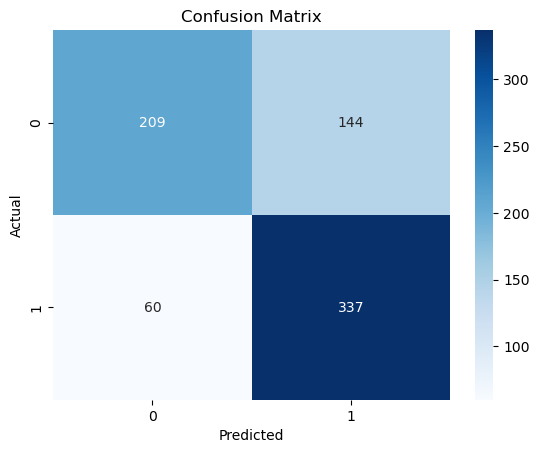

In [13]:
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


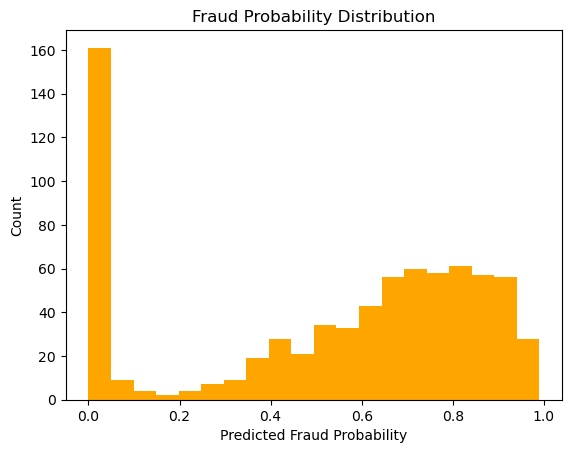

In [14]:
plt.hist(y_probs, bins=20, color='orange')
plt.title("Fraud Probability Distribution")
plt.xlabel("Predicted Fraud Probability")
plt.ylabel("Count")
plt.show()
